## Working with image data

In MNIST, we see a matrix where each row represents an image. The 784 columns each represent a pixel on a 28x28 canvas. After reshaping the row to its original 28x28 format, we can use `matplotlib.pyplot.imshow` to view the image.

In [11]:
# Return X_y returns a tuple if true. as_frame returns a pandas DataFrame if true. 
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [13]:
X.shape

(70000, 784)

In [15]:
import matplotlib.pyplot as plt

In [16]:
img = X[0]
img

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

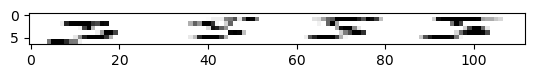

In [31]:
# We get curious results when reshaping incorrectly
plt.imshow(img.reshape(7,112), cmap='gray_r')

In [26]:
y[0] # Matches the visual

'5'

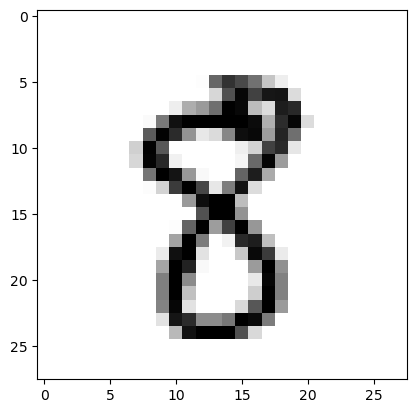

In [27]:
plt.imshow(X[46].reshape(28,28), cmap='gray_r')

In [28]:
y[46] # Also matches the visual 

'8'

## Logistic regression demo

Data is from this [kaggle page](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales)

In [3]:
df = pd.read_csv('../livecoding-data/supermarket_sales - Sheet1.csv')

In [33]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [35]:
df.Payment.value_counts() # Checking distribution 

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [60]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 

In [38]:
X = df.drop(columns='Payment')

In [40]:
y = df.Payment

In [44]:
for col in X.columns:
    print(col)

Invoice ID
Branch
City
Customer type
Gender
Product line
Unit price
Quantity
Tax 5%
Total
Date
Time
cogs
gross margin percentage
gross income
Rating


In [ ]:
# Product line, total, city, gender, customer type 

In [47]:
X = X[['Product line', 'Total', 'City', 'Gender', 'Customer type']]

In [56]:
X = pd.get_dummies(X, drop_first=True)

In [77]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y)

In [78]:
X_train.shape, y_train.shape

((750, 10), (750,))

In [79]:
X_test.shape, y_test.shape

((250, 10), (250,))

In [80]:
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as m

In [82]:
y_pred = clf.predict(X_test)

In [83]:
y_pred.shape, y_test.shape

((250,), (250,))

In [84]:
confusion_matrix(y_pred, y_test)

array([[32, 34, 33],
       [12, 15, 17],
       [42, 29, 36]])

In [85]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

        Cash       0.37      0.32      0.35        99
 Credit card       0.19      0.34      0.25        44
     Ewallet       0.42      0.34      0.37       107

    accuracy                           0.33       250
   macro avg       0.33      0.33      0.32       250
weighted avg       0.36      0.33      0.34       250



In [87]:
# Comparing the overall accuracy on training data. The gap between 
# training accuracy and testing accuracy can reveal overfitting.

clf.score(X_train, y_train) 

0.4

In [88]:
X

,Total,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,City_Naypyitaw,City_Yangon,Gender_Male,Customer type_Normal
0,548.9715,0,0,1,0,0,0,1,0,0
1,80.2200,0,0,0,0,0,1,0,0,1
2,340.5255,0,0,0,1,0,0,1,1,1
3,489.0480,0,0,1,0,0,0,1,1,0
4,634.3785,0,0,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
995,42.3675,0,0,1,0,0,1,0,1,1
996,1022.4900,0,0,0,1,0,0,0,0,1
997,33.4320,0,1,0,0,0,0,1,1,0
998,69.1110,0,0,0,1,0,0,1,1,1


In [91]:
df.Quantity

0       7
1       5
2       7
3       8
4       7
       ..
995     1
996    10
997     1
998     1
999     7
Name: Quantity, Length: 1000, dtype: int64

In [93]:
df.Branch

0      A
1      C
2      A
3      A
4      A
      ..
995    C
996    B
997    A
998    A
999    A
Name: Branch, Length: 1000, dtype: object

In [95]:
df.Rating

0      9.1
1      9.6
2      7.4
3      8.4
4      5.3
      ... 
995    6.2
996    4.4
997    7.7
998    4.1
999    6.6
Name: Rating, Length: 1000, dtype: float64

In [96]:
Xtra = df[['Quantity', 'Rating', 'Branch']]

In [99]:
Xtra = pd.get_dummies(Xtra, drop_first=True)

In [100]:
X_2 = pd.concat([X, Xtra], axis=1)

In [101]:
X_2

,Total,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,City_Naypyitaw,City_Yangon,Gender_Male,Customer type_Normal,Quantity,Rating,Branch_B,Branch_C
0,548.9715,0,0,1,0,0,0,1,0,0,7,9.1,0,0
1,80.2200,0,0,0,0,0,1,0,0,1,5,9.6,0,1
2,340.5255,0,0,0,1,0,0,1,1,1,7,7.4,0,0
3,489.0480,0,0,1,0,0,0,1,1,0,8,8.4,0,0
4,634.3785,0,0,0,0,1,0,1,1,1,7,5.3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,42.3675,0,0,1,0,0,1,0,1,1,1,6.2,0,1
996,1022.4900,0,0,0,1,0,0,0,0,1,10,4.4,1,0
997,33.4320,0,1,0,0,0,0,1,1,0,1,7.7,0,0
998,69.1110,0,0,0,1,0,0,1,1,1,1,4.1,0,0


In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    X_2, y, random_state=42, stratify=y)

In [103]:
clf_2 = LogisticRegression(max_iter=2000)

In [104]:
clf_2.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [109]:
y_pred = clf_2.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[44 33 30]
 [13 17 20]
 [29 28 36]]
              precision    recall  f1-score   support

        Cash       0.51      0.41      0.46       107
 Credit card       0.22      0.34      0.27        50
     Ewallet       0.42      0.39      0.40        93

    accuracy                           0.39       250
   macro avg       0.38      0.38      0.37       250
weighted avg       0.42      0.39      0.40       250



In [110]:
clf_2.score(X_train, y_train)

0.3933333333333333

In [111]:
from sklearn.preprocessing import PolynomialFeatures

In [116]:
X_2.shape

(1000, 14)

In [124]:
poly = PolynomialFeatures(2)
X_3 = poly.fit_transform(X_2)

In [125]:
y.shape

(1000,)

In [126]:
X_3.shape

(1000, 120)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(
    X_3, y, random_state=42, stratify=y)

In [129]:
clf_3 = LogisticRegression(max_iter=2000)

In [130]:
clf_3.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [131]:
y_pred = clf_3.predict(X_test)
print(confusion_matrix(y_pred, y_test))
print(classification_report(y_pred, y_test))

[[36 26 36]
 [ 7 13 10]
 [43 39 40]]
              precision    recall  f1-score   support

        Cash       0.42      0.37      0.39        98
 Credit card       0.17      0.43      0.24        30
     Ewallet       0.47      0.33      0.38       122

    accuracy                           0.36       250
   macro avg       0.35      0.38      0.34       250
weighted avg       0.41      0.36      0.37       250



In [132]:
clf_3.score(X_train, y_train)

0.38266666666666665

## Linear regression evaluation 

We can use the same series of steps (model, predict, evaluate) with linear regression models as well. Here we use 3 of the most common evaluation metrics:

- MSE: Mean Squared Error. This is the metric that is minimized by the LR equation
- RMSE: Root Mean Squared Error. This is simply the sqrt of MSE, easier to understand because it is in the same units as the target
- MAE: Mean Absolute Error. This is the average absolute distance between predictions and true values

In [136]:
X_4 = X_2.drop(columns='Total')

In [137]:
y_4 = X_2.Total

In [138]:
X_train, X_test, y_train, y_test = train_test_split(
    X_4, y_4, random_state=42)

In [141]:
from sklearn.linear_model import LinearRegression, Ridge

In [142]:
est_lr = LinearRegression()
est_ridge = Ridge(alpha=.3)

In [144]:
est_lr.fit(X_4, y_4)
est_ridge.fit(X_4, y_4);

In [145]:
est_lr.coef_

array([23.31974114, 17.06915264,  9.06794285, 18.41436046, 23.09119384,
        6.17600046, -5.91421258,  3.30722088, -2.80689909, 59.42735005,
       -3.73630783, -0.26178787,  6.17600046])

In [146]:
est_ridge.coef_

array([23.11998317, 16.88040481,  8.89197839, 18.22078838, 22.88966625,
        6.17257131, -5.91112776,  3.29951153, -2.80942699, 59.42432941,
       -3.7354582 , -0.26144355,  6.17257131])

In [147]:
y_pred_lr = est_lr.predict(X_test)
y_pred_ridge = est_ridge.predict(X_test)

In [148]:
# MSE for unregularized linear regression
m.mean_squared_error(y_pred_lr, y_test)

32268.56798005315

In [149]:
m.mean_squared_error(y_pred_ridge, y_test)

32270.16212271865

In [152]:
import numpy as np
np.sqrt(m.mean_squared_error(y_pred_ridge, y_test))

179.6389771812305

In [154]:
df.Total.describe()

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64

<Axes: >

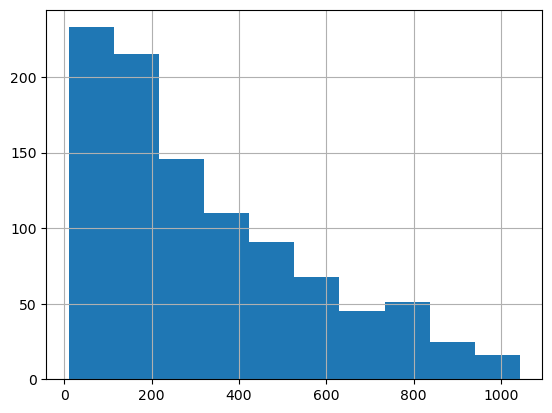

In [155]:
df.Total.hist()

In [156]:
m.mean_absolute_error(y_pred_ridge, y_test)

138.28776945876987

In [157]:
m.mean_absolute_error(y_pred_lr, y_test)

138.28634568356566